In [1]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

import reverse_geocoder as rg
import pprint

%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [5]:
#df = pd.read_csv('data_source/census_income.csv')
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [12]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [13]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)

In [15]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [16]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [19]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<Axes: xlabel='Income'>

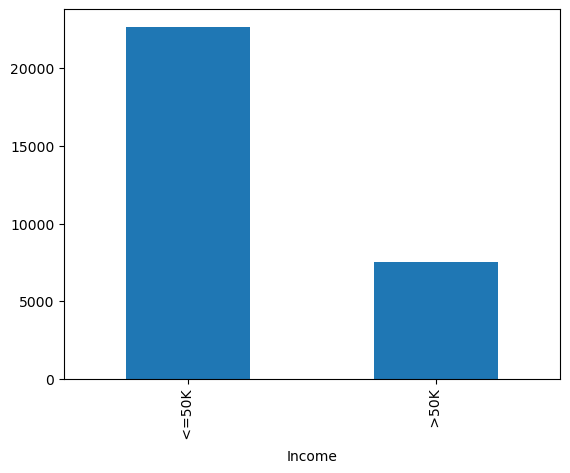

In [20]:
df['Income'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

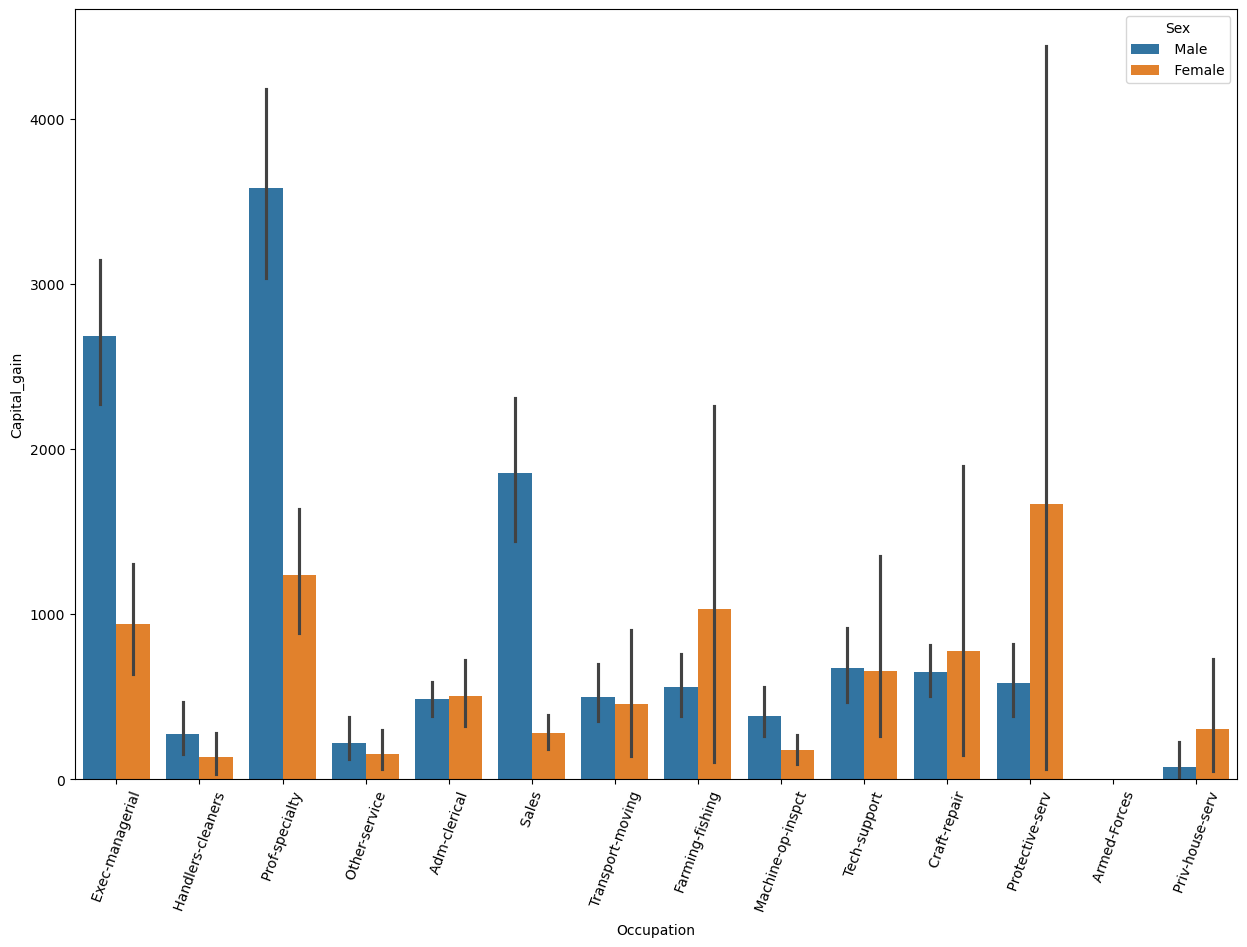

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df,hue='Sex')
plt.xticks(rotation=70)##Checking the distribution of Capital_gain and  Occupation as per gender##

<Axes: xlabel='Education', ylabel='Hours_per_week'>

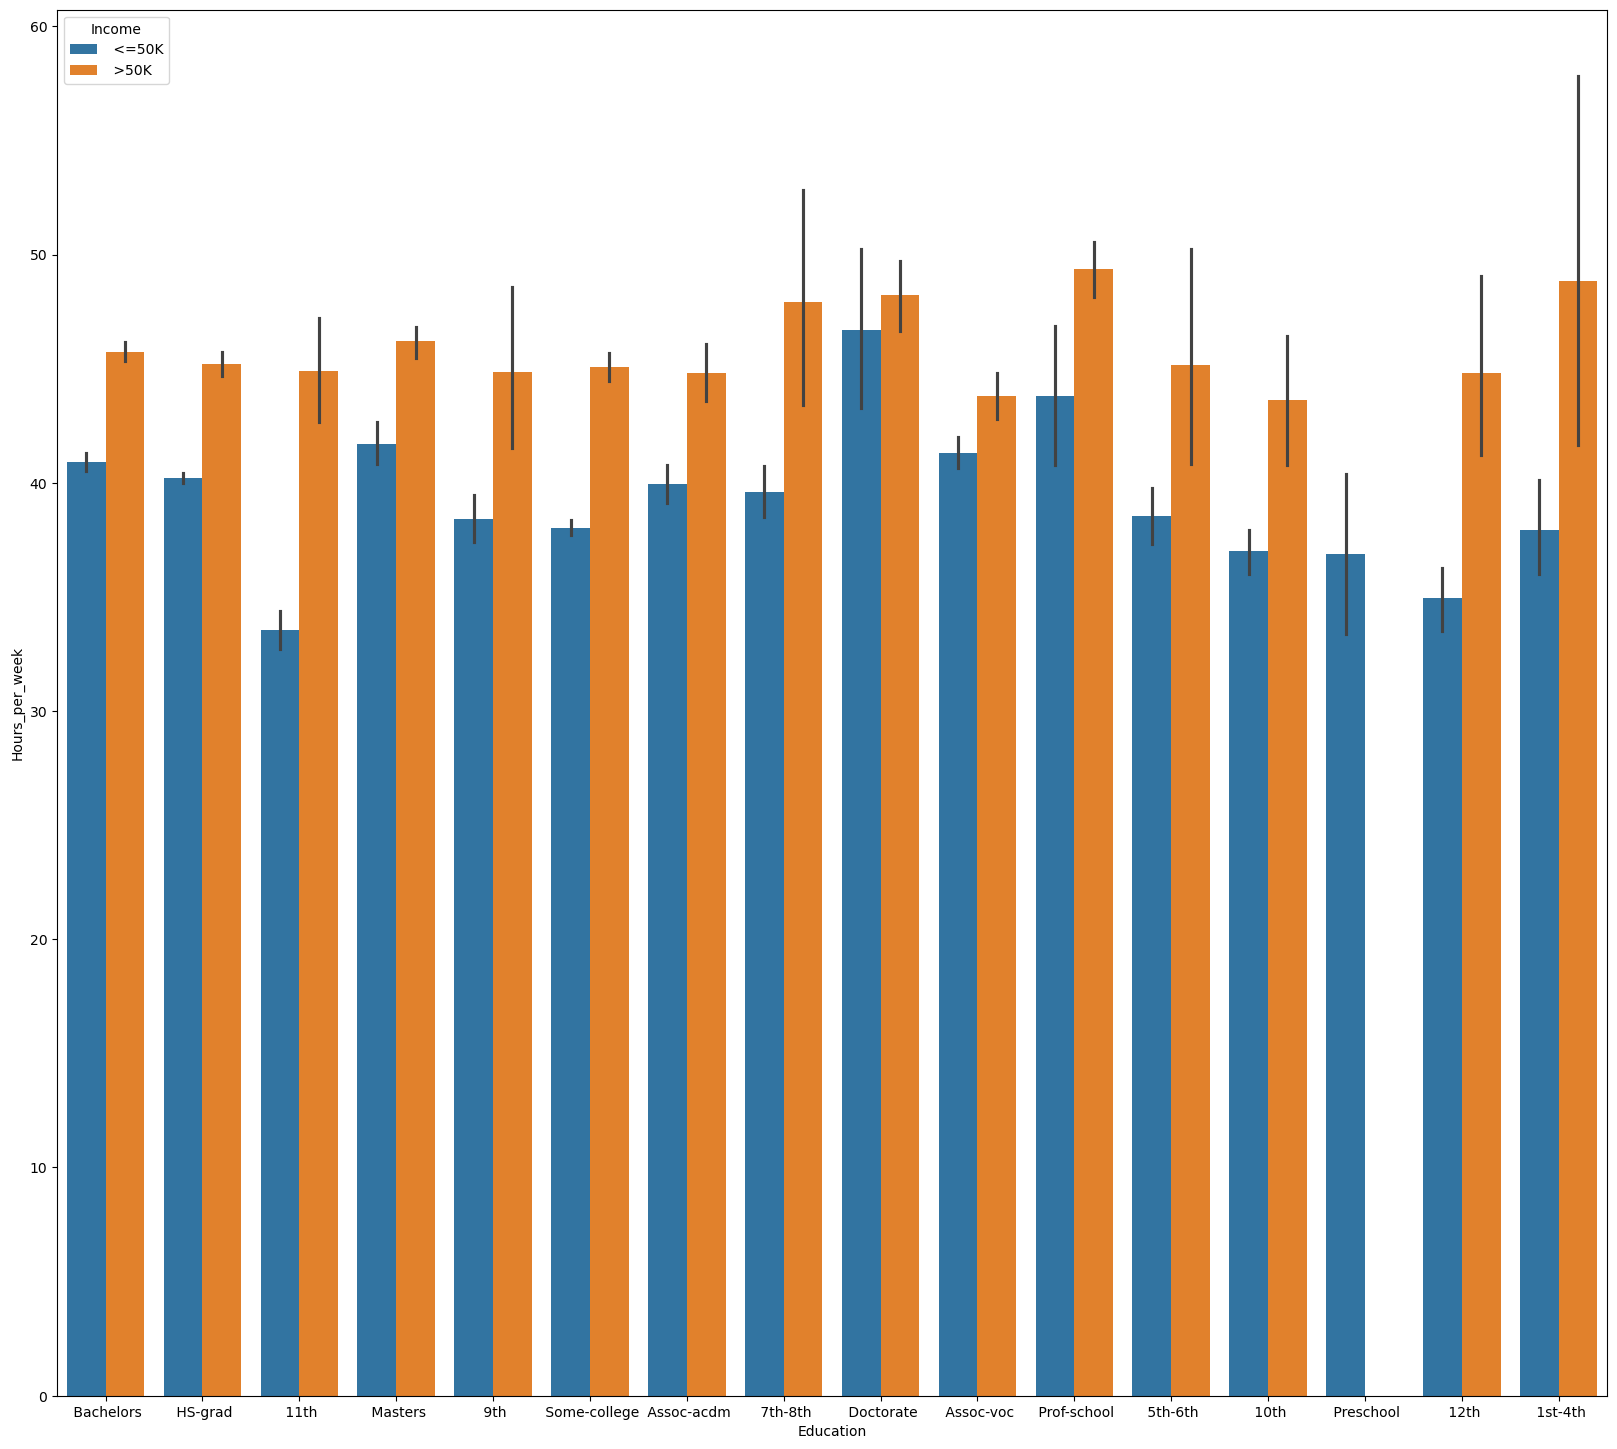

In [22]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df,hue='Income')
##Checking the distribution of Education and  Hours_per_week as gender###

# Data Preprocessing & Feature Engineering :

In [23]:
le = LabelEncoder() # label encoder 
df['Income']=le.fit_transform(df['Income']) 
df['Sex']=le.fit_transform(df['Sex'])

#Converting 2 columns into binary
df = pd.get_dummies(df,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

In [20]:
df.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,1,0,0,40,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,1,0,0,40,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,0,40,0,False,True,False,False,False,False,False,False,False,False,False,False,False,Fals

In [24]:
scaler = StandardScaler()

train_col_sacle = df[['Age','Fnlwgt','Education_num','Hours_per_week']]

train_scaler_col = scaler.fit_transform(train_col_sacle)

train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)

df['Age']= train_scaler_col['Age']
df['Fnlwgt']= train_scaler_col['Fnlwgt']
df['Education_num']= train_scaler_col['Education_num']
df['Hours_per_week']= train_scaler_col['Hours_per_week']

# Data Model Building And Saving.

In [25]:
X = df.drop(['Income'],axis=1)
Y = df['Income']
X.shape, Y.shape 

((30161, 96), (30161,))

In [26]:
df.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Income', 'Workclass_ Local-gov',
       'Workclass_ Private', 'Workclass_ Self-emp-inc',
       'Workclass_ Self-emp-not-inc', 'Workclass_ State-gov',
       'Workclass_ Without-pay', 'Education_ 11th', 'Education_ 12th',
       'Education_ 1st-4th', 'Education_ 5th-6th', 'Education_ 7th-8th',
       'Education_ 9th', 'Education_ Assoc-acdm', 'Education_ Assoc-voc',
       'Education_ Bachelors', 'Education_ Doctorate', 'Education_ HS-grad',
       'Education_ Masters', 'Education_ Preschool', 'Education_ Prof-school',
       'Education_ Some-college', 'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       '

In [27]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(train_scaler_col, Y, random_state=43, test_size=.33)

In [28]:
lr = LogisticRegression() #Logistic Regression
knn = KNeighborsClassifier(n_neighbors=3) #KNearest Neibour
dt = DecisionTreeClassifier() # Deciesion Tree
rf = RandomForestClassifier() # Random Forest
adb = AdaBoostClassifier()    # Adaboost Classifier 
svm = SVC()              # support vactor classifier        
gdboost = GradientBoostingClassifier() #Gradient Boosting Classifier 
xgboost = XGBClassifier()  #Xtrim Gredient Boosting Classifier 
print("Model is created")

Model is created


In [29]:
lr.fit(X_train, Y_train)
knn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
adb.fit(X_train,Y_train)
svm.fit(X_train,Y_train)
gdboost.fit(X_train,Y_train)
xgboost.fit(X_train,Y_train)
print("Model is trained")

Model is trained


In [59]:
print("Lr classification score",lr.score(X_train,Y_train))
print("knn classification score",knn.score(X_train,Y_train))
print("dt classification score",dt.score(X_train,Y_train))
print("rf classification score",rf.score(X_train,Y_train))
print("adb classification score",adb.score(X_train,Y_train))
print("svm classification score",svm.score(X_train,Y_train))
print("gdboost classification score",gdboost.score(X_train,Y_train))
print("xgboost classification score",xgboost.score(X_train,Y_train))

Lr classification score 0.7844311377245509
knn classification score 0.8603949126540308
dt classification score 0.9989607561736032
rf classification score 0.9989112683723462
adb classification score 0.7970010392438264
svm classification score 0.7965061612312565
gdboost classification score 0.8016528925619835
xgboost classification score 0.8352551096154798


In [61]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [62]:
lr_conf_mat = confusion_matrix(Y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[6968  499]
 [1687  800]]


In [34]:
knn_conf_mat = confusion_matrix(Y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[6409 1058]
 [1453 1034]]


In [35]:
dt_conf_mat = confusion_matrix(Y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[6070 1397]
 [1438 1049]]


In [36]:
rf_conf_mat = confusion_matrix(Y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[6442 1025]
 [1457 1030]]


In [47]:
adb_conf_mat = confusion_matrix(Y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[6906  561]
 [1490  997]]


In [37]:
svm_conf_mat = confusion_matrix(Y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[7022  445]
 [1621  866]]


In [38]:
gdboost_conf_mat = confusion_matrix(Y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[6949  518]
 [1541  946]]


In [39]:
xgboost_conf_mat = confusion_matrix(Y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[6834  633]
 [1502  985]]


In [40]:
lr_report = classification_report(Y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      7467
           1       0.62      0.32      0.42      2487

    accuracy                           0.78      9954
   macro avg       0.71      0.63      0.64      9954
weighted avg       0.76      0.78      0.75      9954



In [41]:
knn_report = classification_report(Y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

 knn classification_report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      7467
           1       0.49      0.42      0.45      2487

    accuracy                           0.75      9954
   macro avg       0.65      0.64      0.64      9954
weighted avg       0.74      0.75      0.74      9954



In [42]:
dt_report = classification_report(Y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)

 dt classification_report 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      7467
           1       0.43      0.42      0.43      2487

    accuracy                           0.72      9954
   macro avg       0.62      0.62      0.62      9954
weighted avg       0.71      0.72      0.71      9954



In [43]:
rf_report = classification_report(Y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)

 rf classification_report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      7467
           1       0.50      0.41      0.45      2487

    accuracy                           0.75      9954
   macro avg       0.66      0.64      0.65      9954
weighted avg       0.74      0.75      0.74      9954



In [44]:
adb_report = classification_report(Y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)

 adb classification_report 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      7467
           1       0.64      0.40      0.49      2487

    accuracy                           0.79      9954
   macro avg       0.73      0.66      0.68      9954
weighted avg       0.78      0.79      0.78      9954



In [45]:
svm_report = classification_report(Y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)

 svm classification_report 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      7467
           1       0.66      0.35      0.46      2487

    accuracy                           0.79      9954
   macro avg       0.74      0.64      0.66      9954
weighted avg       0.77      0.79      0.77      9954



In [46]:
gdboost_report = classification_report(Y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

 gdboost classification_report 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      7467
           1       0.65      0.38      0.48      2487

    accuracy                           0.79      9954
   macro avg       0.73      0.66      0.67      9954
weighted avg       0.78      0.79      0.77      9954



In [47]:
xgboost_report = classification_report(Y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.82      0.92      0.86      7467
           1       0.61      0.40      0.48      2487

    accuracy                           0.79      9954
   macro avg       0.71      0.66      0.67      9954
weighted avg       0.77      0.79      0.77      9954



# ROC AUC Curve:

In [92]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from scikitplot.metrics import plot_roc_curve

#importing the ric and auc from sklearn and predect the x_test and checking the roc_auc_score
print(roc_auc_score(Y_test,lr.predict(X_test)))
print(roc_auc_score(Y_test,knn.predict(X_test)))
print(roc_auc_score(Y_test,dt.predict(X_test)))
print(roc_auc_score(Y_test,rf.predict(X_test)))
print(roc_auc_score(Y_test,adb.predict(X_test)))
print(roc_auc_score(Y_test,svm.predict(X_test)))
print(roc_auc_score(Y_test,gdboost.predict(X_test)))
print(roc_auc_score(Y_test,xgboost.predict(X_test)))

0.6274226621258993
0.6370359295415309
0.6173517316158932
0.6384414705766893
0.6628770126958294
0.6443075709236442
0.655503031190071
0.655643254121916


In [95]:
disp = plot_roc_curve(dt, X_test, Y_test)
plot_roc_curve(lr,X_test,Y_test,ax=disp.ax_)   # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

InvalidParameterError: The 'pos_label' parameter of roc_curve must be an instance of 'float', an instance of 'str', an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int' or None. Got DecisionTreeClassifier() instead.

In [68]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [75]:
print("Mean of Cross validation score for gdboost model","=>",cross_val_score(gdboost,X,Y,cv=5).mean())

Mean of Cross validation score for gdboost model => nan


In [76]:
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,Y,cv=5).mean())

Cross validation score for xgboost model => 0.8565034936056815


In [80]:
from sklearn.model_selection import GridSearchCV
xgboost.get_params().keys()

parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}

parm_grid

{'max_depth': [3, 4],
 'subsample': [0.5, 0.8],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [4, 5]}

In [81]:
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)

In [82]:
gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'min_child_weight': [1, 2], 'random_state': [4, 5],
                         'subsample': [0.5, 0.8]})

In [84]:
gridsearch.best_params_   #printing the best parameters

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'random_state': 4,
 'subsample': 0.5}

In [86]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth=4,min_child_weight=2,random_state=4,subsample=0.8)

#supplying best parameters to our model

xgboost_tuning.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=4, ...)

In [87]:
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

In [89]:
xgboost_report = classification_report(Y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      7467
           1       0.64      0.39      0.48      2487

    accuracy                           0.79      9954
   macro avg       0.73      0.66      0.68      9954
weighted avg       0.78      0.79      0.77      9954



In [91]:
import pickle
Census_model = 'Census_model.pickle'
pickle.dump(xgboost_tuning,open(Census_model,'wb'))